<a href="https://colab.research.google.com/github/TandasaNiriksha/BharatIntern-TandasaNiriksha/blob/main/STOCK_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import figure
from tensorflow import keras
import math as mt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv("netflix.csv")
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,23-05-2002,1.242857,1.145714,1.156429,1.196429,104790000,1.196429
1,24-05-2002,1.225000,1.197143,1.214286,1.210000,11104800,1.210000
2,28-05-2002,1.232143,1.157143,1.213571,1.157143,6609400,1.157143
3,29-05-2002,1.164286,1.085714,1.164286,1.103571,6757800,1.103571
4,30-05-2002,1.107857,1.071429,1.107857,1.071429,10154200,1.071429


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4881 non-null   object 
 1   High       4881 non-null   float64
 2   Low        4881 non-null   float64
 3   Open       4881 non-null   float64
 4   Close      4881 non-null   float64
 5   Volume     4881 non-null   int64  
 6   Adj Close  4881 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 267.1+ KB


In [5]:
data.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [6]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4881.000000,4881.000000,4881.000000,4881.000000,4.881000e+03,4881.000000
mean,107.003361,103.742674,105.388477,105.434149,1.679949e+07,105.434149
std,159.326383,154.662309,157.007060,157.073188,1.936794e+07,157.073188
min,0.410714,0.346429,0.377857,0.372857,2.856000e+05,0.372857
25%,3.977143,3.838571,3.901429,3.906429,6.286300e+06,3.906429
50%,22.261429,21.150000,21.524286,21.632856,1.082310e+07,21.632856
75%,127.430000,123.589996,125.949997,125.389999,2.015640e+07,125.389999
max,646.840027,630.859985,642.229981,639.099976,3.234140e+08,639.099976


array([[<Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Adj Close'}>]], dtype=object)

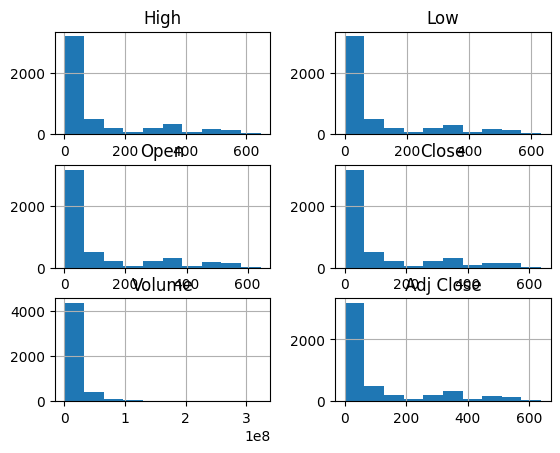

In [7]:
data.hist()

In [8]:
srt=data.sort_values(by='Date')
srt.head()

,Date,High,Low,Open,Close,Volume,Adj Close
678,01-02-2005,1.664286,1.627143,1.631429,1.640000,4743900,1.640000
930,01-02-2006,3.928571,3.785714,3.907143,3.872857,11245500,3.872857
1181,01-02-2007,3.300000,3.235714,3.268571,3.247143,7888300,3.247143
1433,01-02-2008,3.657143,3.510000,3.544286,3.627143,12623100,3.627143
1936,01-02-2010,8.981429,8.532857,8.830000,8.718571,18914000,8.718571


In [9]:
srt.reset_index(inplace=True)
srt.head()

,index,Date,High,Low,Open,Close,Volume,Adj Close
0,678,01-02-2005,1.664286,1.627143,1.631429,1.640000,4743900,1.640000
1,930,01-02-2006,3.928571,3.785714,3.907143,3.872857,11245500,3.872857
2,1181,01-02-2007,3.300000,3.235714,3.268571,3.247143,7888300,3.247143
3,1433,01-02-2008,3.657143,3.510000,3.544286,3.627143,12623100,3.627143
4,1936,01-02-2010,8.981429,8.532857,8.830000,8.718571,18914000,8.718571


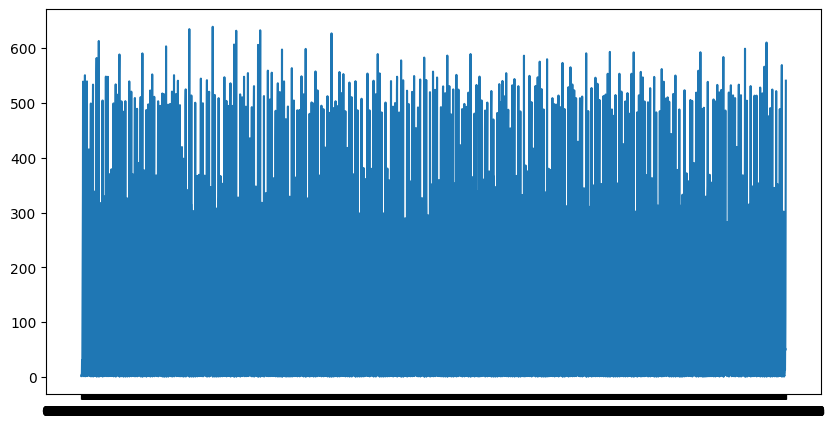

In [10]:
plt.figure(figsize=(10,5))
plt.plot(srt['Date'],srt['Close'])

In [11]:
close_srt = srt['Close']
scaler = MinMaxScaler(feature_range=(0,1))
close_srt = scaler.fit_transform(np.array(close_srt).reshape(-1, 1))
close_srt

array([[0.00198386],
       [0.00547965],
       [0.00450002],
       ...,
       [0.41846845],
       [0.50600192],
       [0.84599058]])

In [12]:
train_size = int(len(close_srt)*0.7)
test_size = len(close_srt) - train_size
train_data,test_data = close_srt[0:train_size,:],close_srt[train_size:len(close_srt),:1]

In [13]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)


In [14]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [15]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True,))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)


Epoch 1/60
47/47 [==============================] - 17s 238ms/step - loss: 0.0614 - val_loss: 0.0551
Epoch 2/60
47/47 [==============================] - 11s 233ms/step - loss: 0.0422 - val_loss: 0.0349
Epoch 3/60
47/47 [==============================] - 8s 173ms/step - loss: 0.0342 - val_loss: 0.0307
Epoch 4/60
47/47 [==============================] - 9s 199ms/step - loss: 0.0307 - val_loss: 0.0276
Epoch 5/60
47/47 [==============================] - 9s 196ms/step - loss: 0.0280 - val_loss: 0.0261
Epoch 6/60
47/47 [==============================] - 9s 185ms/step - loss: 0.0250 - val_loss: 0.0218
Epoch 7/60
47/47 [==============================] - 9s 185ms/step - loss: 0.0247 - val_loss: 0.0210
Epoch 8/60
47/47 [==============================] - 10s 210ms/step - loss: 0.0241 - val_loss: 0.0217
Epoch 9/60
47/47 [==============================] - 9s 196ms/step - loss: 0.0238 - val_loss: 0.0230
Epoch 10/60
47/47 [==============================] - 8s 172ms/step - loss: 0.0231 - val_loss: 0.0

In [19]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

43/43 [==============================] - 2s 54ms/step


In [20]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [21]:
mt.sqrt(mean_squared_error(y_train,train_predict))

186.90226970237484

In [22]:
mt.sqrt(mean_squared_error(y_test,test_predict))

187.2579284074057

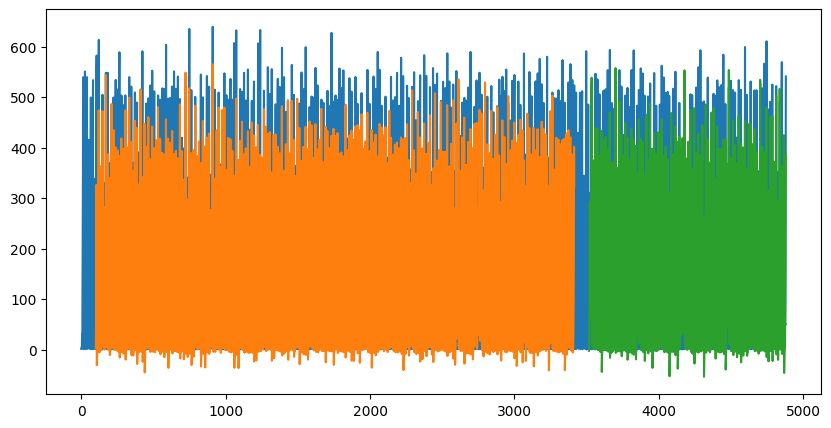

In [23]:
look_back=100

trainPredictPlot = np.empty_like(close_srt)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(close_srt)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_srt)-1, :] = test_predict

plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(close_srt))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()